In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from sklearn import cross_validation
from sklearn import linear_model
import warnings

import time
from sklearn.feature_extraction import DictVectorizer
from scipy import sparse
import pickle

warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
from datetime import datetime
%matplotlib inline
t = time.time()
#elapsed = (time.time() - t)/60

In [16]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
X=np.load('./mostrecentinput/nxtrain_standard_original0.npy')
X1= np.load('./mostrecentinput/nxtrain_standard_derived0.npy')
X2=pd.read_pickle("./mostrecentinput/time_series_derived_standard_train2.dat")
X3=pd.read_pickle("./mostrecentinput/time_series_original_standard_train2.dat")
X=np.hstack((X,X1,X2,X3))
y=pickle.load(open("./mostrecentinput/ytrain2.dat","rb"))

In [3]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# First Run

Finished fold with 1 / 77 feature ranks, score=0.529579
Finished fold with 2 / 77 feature ranks, score=0.533023
Finished fold with 3 / 77 feature ranks, score=0.729138
Finished fold with 4 / 77 feature ranks, score=0.743977
Finished fold with 5 / 77 feature ranks, score=0.747041
Finished fold with 6 / 77 feature ranks, score=0.752556
Finished fold with 7 / 77 feature ranks, score=0.752174
Finished fold with 8 / 77 feature ranks, score=0.754219
Finished fold with 9 / 77 feature ranks, score=0.758101
Finished fold with 10 / 77 feature ranks, score=0.759352
Finished fold with 11 / 77 feature ranks, score=0.757492
Finished fold with 12 / 77 feature ranks, score=0.758765
Finished fold with 13 / 77 feature ranks, score=0.759934
Finished fold with 14 / 77 feature ranks, score=0.760223
Finished fold with 15 / 77 feature ranks, score=0.758347
Finished fold with 16 / 77 feature ranks, score=0.758706
Finished fold with 17 / 77 feature ranks, score=0.757433
Finished fold with 18 / 77 feature ranks

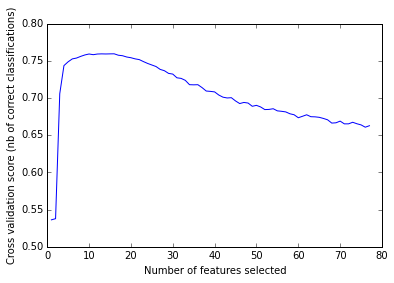

In [5]:
def scorer(estimator, X_test, y_test):
    preds_cv = estimator.predict_proba(X_test)[:,1]
    roc_auc=metrics.roc_auc_score(y_test, preds_cv)
    return roc_auc

clf = linear_model.SGDClassifier(loss='log',average=True,n_iter=20)
selector = RFECV(estimator=clf, step=20, cv=StratifiedKFold(y, 2),
              scoring=scorer,verbose=True)
selector1 = selector.fit(X, y)

Xselect=X[:,selector1.support_]
clf = linear_model.SGDClassifier(loss='log',average=True,n_iter=100)
skf = cross_validation.StratifiedKFold(y, n_folds=2) # K-fold cv splitting
for train0, cv0 in skf:
    train, cv = train0, cv0
    break

MODEL = clf.fit(Xselect[train,:], y[train])
AUC1=scorer(MODEL, Xselect[cv,:], y[cv])

str1=time.strftime("%b%d%Y%H%M%S", time.localtime())
filename='SDGLogistic_'  +  str1 + '_AUC_' + str(AUC1) + '.p'
np.arange(X.shape[1])[selector1.support_].dump(filename)


# Plotting
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(selector1.grid_scores_) + 1), selector1.grid_scores_)
plt.show()

# Second Run

Finished fold with 1 / 152 feature ranks, score=0.557820
Finished fold with 2 / 152 feature ranks, score=0.565190
Finished fold with 3 / 152 feature ranks, score=0.627059
Finished fold with 4 / 152 feature ranks, score=0.672034
Finished fold with 5 / 152 feature ranks, score=0.729521
Finished fold with 6 / 152 feature ranks, score=0.733817
Finished fold with 7 / 152 feature ranks, score=0.744745
Finished fold with 8 / 152 feature ranks, score=0.747647
Finished fold with 9 / 152 feature ranks, score=0.750440
Finished fold with 10 / 152 feature ranks, score=0.749886
Finished fold with 11 / 152 feature ranks, score=0.751624
Finished fold with 12 / 152 feature ranks, score=0.753820
Finished fold with 13 / 152 feature ranks, score=0.754165
Finished fold with 14 / 152 feature ranks, score=0.756435
Finished fold with 15 / 152 feature ranks, score=0.756657
Finished fold with 16 / 152 feature ranks, score=0.755658
Finished fold with 17 / 152 feature ranks, score=0.757320
Finished fold with 18 /

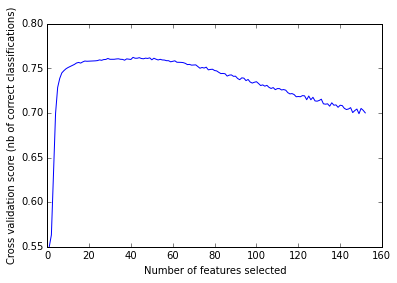

In [6]:
def scorer(estimator, X_test, y_test):
    preds_cv = estimator.predict_proba(X_test)[:,1]
    roc_auc=metrics.roc_auc_score(y_test, preds_cv)
    return roc_auc

clf = linear_model.SGDClassifier(loss='log',average=True,n_iter=40)
selector = RFECV(estimator=clf, step=10, cv=StratifiedKFold(y, 2),
              scoring=scorer,verbose=True)
selector1 = selector.fit(X, y)

Xselect=X[:,selector1.support_]
clf = linear_model.SGDClassifier(loss='log',average=True,n_iter=100)
skf = cross_validation.StratifiedKFold(y, n_folds=2) # K-fold cv splitting
for train0, cv0 in skf:
    train, cv = train0, cv0
    break

MODEL = clf.fit(Xselect[train,:], y[train])
AUC1=scorer(MODEL, Xselect[cv,:], y[cv])

str1=time.strftime("%b%d%Y%H%M%S", time.localtime())
filename='SDGLogistic_'  +  str1 + '_AUC_' + str(AUC1) + '.p'
np.arange(X.shape[1])[selector1.support_].dump(filename)


# Plotting
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(selector1.grid_scores_) + 1), selector1.grid_scores_)
plt.show()